**Classification Analysis of Determining Insurance Providers for Medical Patients Based on Age, Medical Condition, Hospitalization Period, and Billing Amount with the Healthcare Dataset.**

In [98]:
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)

In [99]:
# download.file("https://raw.githubusercontent.com/An-Dao/dsci_project/main/data/healthcare_dataset%202.csv","data/healthcare_data_read.csv")
health_data <- read_csv("data/healthcare_data_read.csv")

# Define age ranges
age_ranges <- c(0, 20, 30, 40, 50, 60, 70, 80, Inf)
age_labels <- c("0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81+")

condition_levels <- c("Aspirin","Lipitor","Ibuprofen","Paracetamol","Penicillin")

gender_condition_levels <- c("Male","Female")

medical_condition_levels <- c("Asthma", "Obesity", "Arthritis", "Diabetes", "Cancer", "Hypertension")

blood_condition_levels <- c("A+" ,"A-" ,"B+" , "B-", "AB+", "AB-", "O+", "O-")

summary_health_data <- health_data |>
  clean_names() |>
  mutate(time_spent = as.numeric(difftime(discharge_date, date_of_admission))) |>
  select(billing_amount, age, insurance_provider, medical_condition, time_spent) |>
  mutate(insurance_provider = as_factor(insurance_provider)) |>
  mutate(medical_condition = factor(medical_condition, levels = medical_condition_levels),
         medical_condition = as.numeric(medical_condition)) 
summary_health_data

    # blood_type = factor(blood_type, levels = blood_condition_levels),
    # blood_type = as.numeric(blood_type),
      
    # medical_condition = factor(medical_condition, levels = medical_condition_levels),
    # medical_condition = as.numeric(medical_condition),
      
    #  gender = factor(gender, levels = gender_condition_levels),
    # gender = as.numeric(gender),
      

Rows: 10000 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): Name, Gender, Blood Type, Medical Condition, Doctor, Hospital, In...
dbl   (3): Age, Billing Amount, Room Number
date  (2): Date of Admission, Discharge Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


billing_amount age insurance_provider medical_condition time_spent
1     37490.983      81  Medicare           4                 14        
2     47304.065      35  UnitedHealthcare   1                 14        
3     36874.897      61  Medicare           2                 30        
4     23303.322      49  Medicare           1                  1        
5     18086.344      51  UnitedHealthcare   3                 24        
6     22522.363      41  Aetna              3                  3        
7     39593.436      82  Cigna              6                 24        
8     13546.817      55  Blue Cross         3                 17        
9     24903.037      33  Aetna              4                  5        
10    22788.236      39  Blue Cross         1                  1        
11    40325.071      45  Aetna              5                 28        
12     6185.904      23  Medicare           6                 17        
13     4835.946      85  Aetna              4                 15        
14    13669.378      72  Cigna              4                 16        
15    10342.836      65  Cigna              5                 20        
16    27174.943      32  Aetna              3                  7        
17    17394.994      64  Aetna              4                 19        
18    45213.538      23  Medicare           3                  8        
19     4262.912      66  UnitedHealthcare   2                 10        
20    16609.312      80  Blue Cross         3                 28        
21    32263.622      55  Aetna              3                 30        
22    42610.705      79  Blue Cross         1                 14        
23    16701.347      51  Medicare           2                 23        
24    22331.280      33  UnitedHealthcare   4                 21        
25    41319.500      54  Cigna              1                 29        
26    37766.521      26  UnitedHealthcare   2                 27        
27    35834.357      70  Aetna              2                 17        
28    12680.731      74  Cigna              6                 14        
29    12935.413      56  Aetna              5                 28        
30    18393.422      35  UnitedHealthcare   6                 16        
⋮     ⋮              ⋮   ⋮                  ⋮                 ⋮         
9971   9640.999      35  Cigna              3                 23        
9972  38831.708      56  Blue Cross         4                 17        
9973  27648.105      43  UnitedHealthcare   3                  4        
9974  18614.470      69  Blue Cross         5                 21        
9975  10021.901      32  UnitedHealthcare   2                 22        
9976  20793.031      80  Blue Cross         1                  8        
9977  37726.182      81  Blue Cross         3                 30        
9978  22434.605      84  UnitedHealthcare   5                  5        
9979   4997.580      46  Medicare           3                 23        
9980  14416.635      63  Blue Cross         5                 20        
9981  47369.550      71  Medicare           5                 22        
9982  46629.772      54  UnitedHealthcare   3                 29        
9983  35961.407      78  Blue Cross         2                 18        
9984   1675.089      74  Medicare           2                 14        
9985  37181.841      72  Medicare           4                 15        
9986  27476.722      72  Cigna              6                 12        
9987  15872.814      18  Blue Cross         2                  4        
9988  27920.309      84  Cigna              2                 21        
9989   6532.310      60  UnitedHealthcare   5                 22        
9990  36044.467      47  UnitedHealthcare   3                 23        
9991  48753.129      35  Blue Cross         3                 14        
9992  14426.402      56  UnitedHealthcare   1                  4        
9993   8296.299      37  UnitedHealthcare   6                  6

In [100]:
set.seed(2000)

health_split <- initial_split(summary_health_data, prop = 3/4, strata = insurance_provider)
health_training <- training(health_split)
health_testing <- testing(health_split)
head(health_testing,  5)


billing_amount age insurance_provider medical_condition time_spent
1 37490.98       81  Medicare           4                 14        
2 18086.34       51  UnitedHealthcare   3                 24        
3 13546.82       55  Blue Cross         3                 17        
4 24903.04       33  Aetna              4                  5        
5 40325.07       45  Aetna              5                 28

In [101]:
#Using only training data, summarize the data in at least one table (this is exploratory data analysis). 
#An example of a useful table could be one that reports the number of observations in each class, 
#the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 


# count_blood_type <- health_training |>
#     group_by(blood_type)|>
#     summarize(count = n())
# count_blood_type 

# count_age_range <- health_training |>
#     group_by(age_range)|>
#     summarize(count = n())
# count_age_range

# count_med_cond <- health_training |>
#     group_by(medical_condition) |>
#     summarize(count = n())
# count_med_cond
# count_medication <- health_training |>
#     group_by(medication) |>
#     summarize(count = n())
# count_medication
# count_billrange <- health_training |>
#     group_by(billing_range) |>
#     summarize(count = n())
# count_billrange

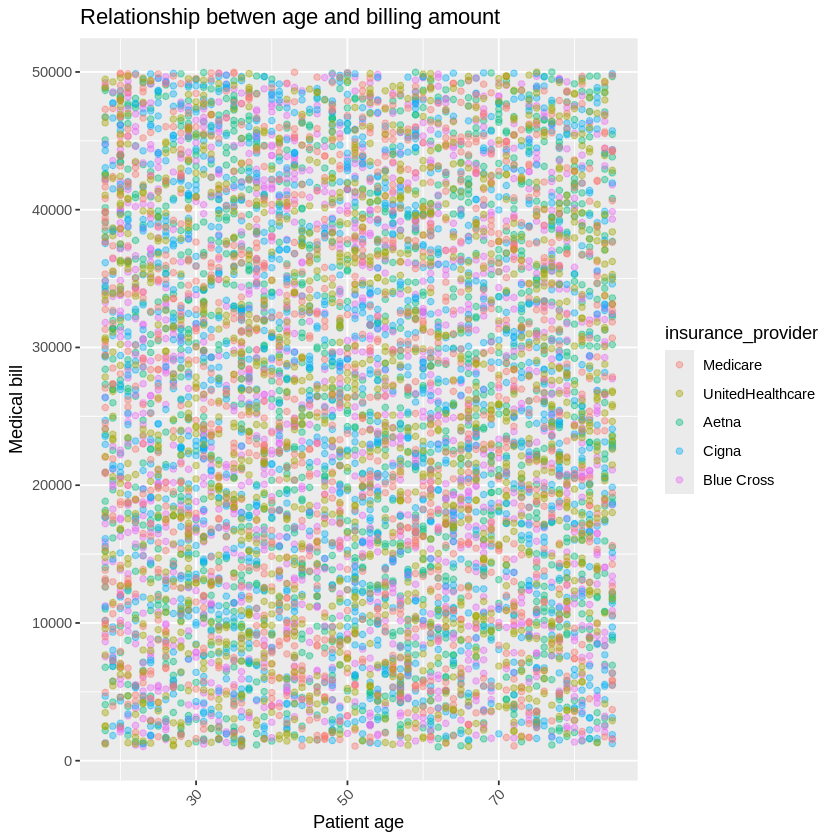

In [102]:

# training_plot <- summary_data |>
#    ggplot(aes(x = age_range, y = count, fill = gender)) + 
#     geom_point(stat = "identity", position = "dodge") +
#   facet_wrap(~ medical_condition, scales = "free") +
#   labs(title = "Distribution of Male and Female by Age Group for Each Medical Condition", x = "Age Group", y = "Patient ammount")+
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))

# training_plot2 <- summary_data |>
#    ggplot(aes(x = blood_type, y = count, fill = gender)) + 
#     geom_bar(stat = "identity", position = "dodge") +
#   facet_wrap(~ medical_condition, scales = "free") +
#   labs(title = "Distribution of Male and Female by Blood type for Each Medical Condition", x = "Blood type", y = "Patient ammount")+
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))
# training_plot
# training_plot2


training_plot_age_bill <- health_training |>
   ggplot(aes(x = age, y = billing_amount, colour = insurance_provider)) + 
    geom_point(alpha = 0.4) +
  labs(title = "Relationship betwen age and billing amount", x = "Patient age", y = "Medical bill")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

training_plot_age_bill

#The result of the graph is unreadable because there are too many points and the points are evenly spread out.

**Classification Analysis of Patients with Asthma Based on Age, Gender, and BloodType with the Healthcare Dataset**

**Introduction**
<br> Medical bills can be a heavy cost for lower and middle-class citizens all around the world. For those who are faced with life-threatening accidents that require emergency surgery, nothing is more daunting than waking up from surgery to a massive bill. A modern solution would be to connect with an insurance company to receive medical insurance aid. Health, or medical, insurance is a system offered by insurance companies that combines a large sum of people’s funds and protects everyone in the group of clients from financially damaging medical expenses from illness or disease (National Academies Press, 2001).  Understanding and learning about which insurance is most suitable for patients allows for patients to make the right choice when selecting companies and health insurance plans. For our group report, we will be analyzing a dataset found through Kaggle called “Healthcare Dataset”. This dataset includes patient information that simulates real-life healthcare files. Each column provides information about the patient, their date of admission, and services provided based on their condition. Through data classification, the organization and categorizing of new data through past data, we answered the predictive question of “what is the most suitable insurance provider for a new patient based on their age, medical condition, hospitalization period, and billing amount?” 


**Methods and Preliminary Exploratory Data Analysis**
<br> The dataset was loaded into R through a series of steps, using our data from the web source https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data. To successfully use the data, some preprocessing steps were needed. First, we loaded the necessary library() functions in from R packages. This was a necessary step to ensure we could use functions from R. The data was loaded through downloading the uniform resource locator (url) and set to object “health_data”. This object was created using the read_csv reading function due to the dataset format. 
After viewing the data, it was found that many columns were unnecessary for our classification. Removal of these columns were needed to keep the data frame clear for our classifiers and reduce any unnecessary data noise. Using the technique of wrangling, we tidied the data through mutating names, selecting the appropriate columns, and changing all columns used as predictors into factors. These new changes were set to a new object named compress_heath_data to show the new, compressed form of the dataframe. 
To successfully complete our classification, we needed to split our data into a training set and testing set. Splitting the data is an important step to training our model on the training set and evaluating the performance on the testing set. This allows us to see whether our classification algorithm is with unseen data and removes the possibility of bias. 
The dataset was split into training and testing sets by using the function initial_split. This allowed us to split the data into 75% training set and 25% testing set. The training set was set to object health_training and the testing set was set to the object health_testing. 
Using the training set data, a graph was plotted to visually show the data points. We decided to use a scatter plot as our visualization format to see the relationships and assess linearity. Initially, we wanted to see if there was a positive or negative trend between age and billing amount, with the fill-in colours as insurance providers. If a relationship between these variables exists, we want to analyze whether the correlation is positive or negative.
After analyzing the visualization and determining that there was no relationship between the variables, we decided to start classification using the K-nearest neighbour algorithm. We chose to use classification over regression due to the variable of the insurance provider being categorical in nature. Regression is a technique when outcome variables are continuous, so in our case, it was not the right choice. 
Using the nearest_neighbour function, we created a recipe for our classification algorithm. In our recipe, we used all predictors because during data wrangling we already selected the necessary columns. From our codes, we returned the results from the k-nearest neighbors algorithm. 
To determine what k value to use, we created an elbow graph with the cross-validation technique. By looking at the elbow graph, we concluded that k = 7 was the best neighbours value. 


**Expected Outcomes and Significance** 
<br> In our data analysis project, we expect to find a correlation between the predictive factors of a patient’s age, medical condition, hospitalization period, and billing amount and the most suitable insurance provider. We will also expect to have a model such that when given said predictive factors will predict which insurance provider is the best for that patient. Any correlations found could significantly impact healthcare strategies, ecouraging personalized healthcare reccomendations, optimizing resource allocation and improving patient satisfaction. A predictive model for insurance providers can provide reccomendations for insurance providers based on individual patient preferences and needs so they can make more informed decisions. Additionally, by understanding the factors that affect insurance provider selection can allow a more effective allocation of resources. Lastly, matching patients to insurance providers that align with their preferences leads to higher patient satisfaction

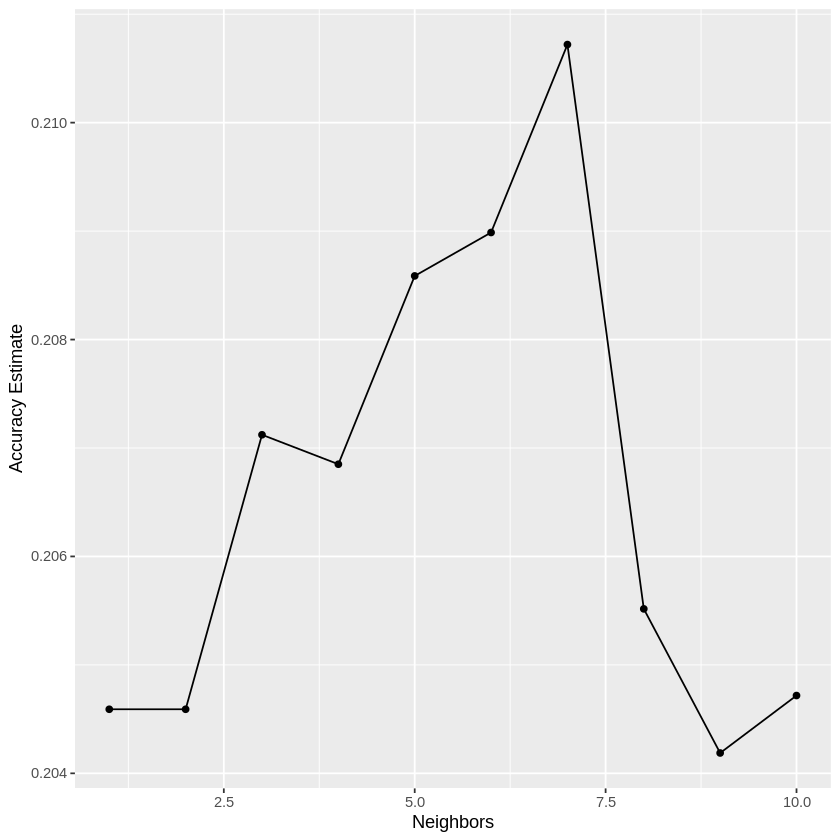

In [103]:
set.seed(2100) 

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")
recipe <- recipe(insurance_provider ~ ., data = health_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
vfold <- vfold_cv(health_training, v = 5, strata = insurance_provider)
k <- tibble(c(1,2,3,4,5,6,7,8,9,10))
colnames(k) <- "neighbors"
knn_results <- workflow() |>
       add_recipe(recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = vfold, grid = k) |>
       collect_metrics()
#knn_results
accuracies <- knn_results |> 
       filter(.metric == "accuracy")
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate")
cross_val_plot





In [104]:

recipe <- recipe(insurance_provider ~ ., data = health_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
       set_engine("kknn") |>
       set_mode("classification")
best_fit <- workflow() |>
       add_recipe(recipe) |>
       add_model(best_spec) |>
       fit(data = health_training)
predictions <- predict(best_fit, health_testing) |>
               bind_cols(health_testing)
metrics <- predictions  |>
           metrics(truth = insurance_provider, estimate = .pred_class)
metrics
conf_mat <- predictions  |>
            conf_mat(truth = insurance_provider, estimate = .pred_class)
conf_mat

#Based on the best fit graph, we have decided that the best number of neighbors to use is 7 as the acurracy peaked above 0.210. Overall we find that the model is incapable of predicting the most suitable insurance provider.
#This result disproves our case study as all evidence points toward the lack of correlation between our chosen variables and the insurance provider, meaning there is no competition in this market.
#as everyone is provided with the same coverage. This unfortunate outcome also let us understand that the healthcare and insurance system are good and provide equal security to average Canadian health.

.metric  .estimator .estimate  
1 accuracy multiclass  0.19064748
2 kap      multiclass -0.01200067

                  Truth
Prediction         Medicare UnitedHealthcare Aetna Cigna Blue Cross
  Medicare               86               90    85    96         89
  UnitedHealthcare       94               95   100   104         97
  Aetna                  97              105   102   110        105
  Cigna                  91              102   108    89        112
  Blue Cross            114              103   112   111        105

.pred_class
1 Cigna

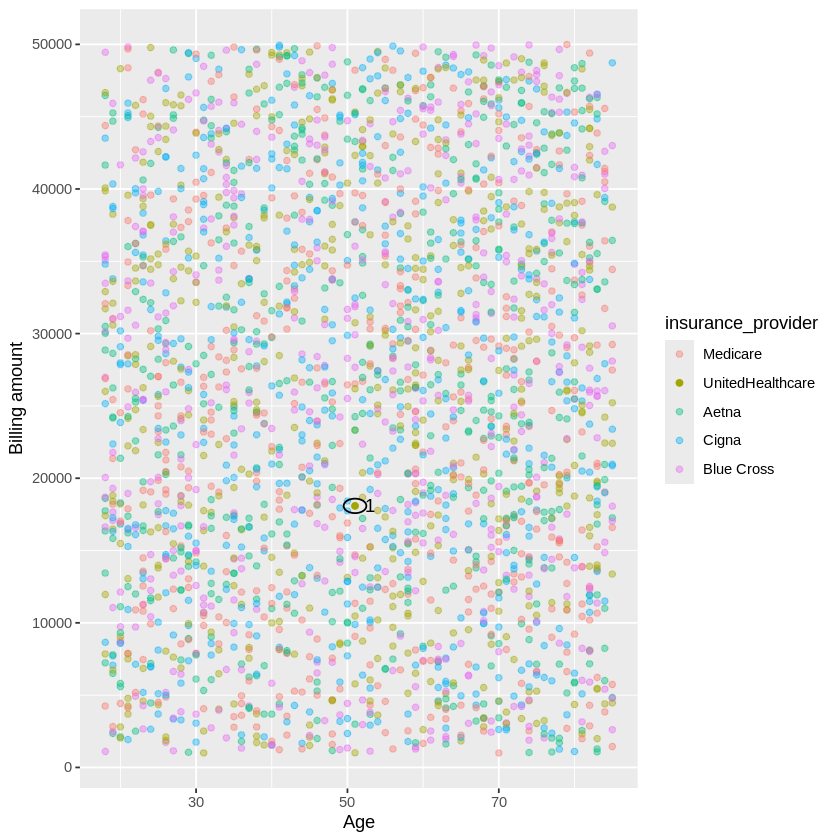

In [106]:

point <- tibble(age= 51,billing_amount = 18086.34, insurance_provider = "UnitedHealthcare", medical_condition = 3, time_spent = 24)
# Original plot
test_plot <- health_testing %>%
  ggplot(aes(x = age, y = billing_amount, colour = insurance_provider)) +
  geom_point(alpha = 0.4) +
  labs(x = "Age", y = "Billing amount")

# Modify the plot (adding annotations, adjusting size)
test_plot +
  geom_point(data = point, aes(x = age, y = billing_amount)) +
  annotate("path", 
                 x=point$age + 1.5*cos(seq(0,2*pi,length.out=100)),
                 y=point$billing_amount + 500*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = point$age+2, y =  point$billing_amount, label = "1")

predict_point <- predict(best_fit, point)
predict_point

#We used a data point from the testing to try out the model, and, as expected, it is inaccurate. The point is supposed to be UnitedHealthCare. Instead, the model predicted that the insurance provider is Cigna, which is incorrect.


**Results**
<br> For our analysis, we chose to use the k-nearest neighbours (KNN) algorithm as it is simple and its ability to handle classification tasks aligns with our predictive question about the most suitable insurance provider for patients. Since we were looking to classify our patients based on their age, medical condition, hospitalization period, and billing amount to find the most suitable insurance provider, we found that the KNN algorithm would be the most effective. In order to train the models, we split the dataset into training and testing sets. 75% of our data was allocated for training whereas the other 25% went to testing. The KNN model was trained on the training set using cross-validation to select the optimal number of neighbours, which we found to be 7. The main evaluation metric that was used to assess the performance of the models was accuracy, which measures the number of correct predictions. Accuracy was chosen as it measures the number of correctly predicted insurance providers. As we are using our model to classify our patients to find a suitable insurance provider, seeing whether the model is effective in correctly predicting the insurance provider provides insight into the model’s effectiveness. We conducted our analysis using the R programming language. Packages such as tidyverse, caret, and kknn were used for our data analysis and modeling. The KNN model revealed a lack of correlation between the age, medical condition, hospitalization period, and billing amount of patients with the best insurance provider. Despite using the KNN algorithm, the model did not accurately predict insurance providers based on the available features. All insurance providers were found to be equal regarding their likelihood of being selected by patients. The KNN model evaluation was not accurate. When testing a point, the model failed to correctly predict the insurance provider, predicting Cigna instead of the correct answer, UnitedHealthCare. Therefore, the accuracy of the model is a poor indication of the best insurance provider for patients. The importance of individual features on the model’s predictions can be assessed using feature importance scores or coefficients obtained from the model. The importance of features can help identify the most influential factors driving the selection of insurance providers among patients. Visualizations such as plots were used to present the results clearly. Model performance, feature importance, and other insights were visualized. As seen in our analysis, the results of our graph were initially unreadable as there were too many points and they were evenly spread.

**Discussion**
<br> Our analysis revealed a lack of correlation between the age, medical condition, hospitalization period, and billing amount of patients and their choice of insurance provider. Despite using the KNN algorithm, which identifies relationships between variables, the model struggled to accurately predict insurance providers based on the aforementioned features. All insurance providers were found to be nearly equal in terms of the likelihood of being selected by patients. Unfortunately, this was not what we expected to uncover through our analysis. Our findings contradicted our initial expectations, as there was no significant relationship between the predictors and insurance provider selection. The lack of correlation suggests that there may be additional factors that play a role in patients’ choice of insurance providers. Our findings underscore the challenge of predicting health insurance provider selection based on demographic and medical information. This could motivate future research in healthcare, emphasizing the consideration of additional factors. Future research on the selection of health insurance is important as “health insurance is associated with more appropriate use of health care services and better health outcomes for adults” (National Academy of Sciences, 2002). The inconclusiveness of our results leads to several future questions. This analysis could raise future questions regarding the influence of other factors, such as personal biases, provider reputation, and location when it comes to selecting insurance providers. The exploration of these factors in future research could provide a more comprehensive understanding of selecting insurance providers and help improve the accuracy of predictive models in healthcare. The results of our analysis suggest that demographic and medical information may not be sufficient to accurately predict insurance provider selection among patients. The lack of correlation between age, medical condition, hospitalization period, and billing amount indicates that there are other factors beyond those considered that play a more significant role in influencing insurance provider selection. Despite our efforts to find potential relationships between age, medical condition, hospitalization period, and billing amount and the insurance providers selected, no significant patterns or trends were observed in the data. All insurance providers appeared to be nearly equal in their likelihood of being chosen by patients. It is important to acknowledge the limitation due to the limited set of predictors, which may not fully showcase the range of factors that influence the selection of insurance providers. These limitations could affect the accuracy of the predictive model. Future research could explore the impact of additional factors, such as socioeconomic status, cultural background, previous healthcare experiences, etc. on insurance provider selection, since our inconclusive results suggest the presence of additional factors. The predictive accuracy of our model could be improved by using more comprehensive datasets to enhance our understanding of insurance provider selection. Considering avenues for future research and areas for improvement could advance our understanding of patients’ insurance provider selection and enhance the quality and accessibility of healthcare services for all patients.

**References**

<br> Healthcare Dataset . (2023, October 31). Kaggle. https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data

<br>    Institute of Medicine (US) Committee on the Consequences of Uninsurance. Coverage Matters: Insurance and Health Care. Washington (DC): National Academies Press (US); 2001. 1, Why Health Insurance Matters. Available from: https://www.ncbi.nlm.nih.gov/books/NBK223643/

<br>    Institute of Medicine (US) Committee on the Consequences of Uninsurance. Care Without Coverage: Too Little, Too Late. Washington (DC): National Academies Press (US); 2002. 3, Effects of Health Insurance on Health. Available from: https://www.ncbi.nlm.nih.gov/books/NBK220636/ 

**Contributors:**
<br>*An Dao*, *Moya Ku*, Avireet Uppal, Kaelan Zhang